In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d
import warnings
#suppress warnings
warnings.filterwarnings('ignore')

In [20]:
%pwd
%cd "E:\\Universidad\\2023-1\\INTELIGENCIA ARTIFICIAL\\Documents\\Taller 1"
%pwd

E:\Universidad\2023-1\INTELIGENCIA ARTIFICIAL\Documents\Taller 1


'E:\\Universidad\\2023-1\\INTELIGENCIA ARTIFICIAL\\Documents\\Taller 1'

In [21]:
data = np.loadtxt("datos2.txt",delimiter=',',skiprows=0,usecols=[0,1,2],dtype='float')
print(data[:,0])
dataSize = data.shape
print(dataSize[0])

[3104. 2600. 3400. 2416. 4000. 2985. 2534. 2427. 2380. 2494. 2940. 3000.
 2890. 5478. 2268. 3300. 2320. 2236. 3609. 4031. 2767. 2888. 2604. 2962.
 4890. 2100. 2458. 3526. 3200. 3637. 2839. 2000. 3040. 4137. 2811. 2437.
 2239. 3132. 5215. 3162. 2664. 3238. 3567. 2200. 1852. 2852. 2203.]
47


In [22]:
# Cálculo del promedio y la desviación estándar, se crea un vector para cada uno y se almacena la información en filas.

prom = []
desv = []
dataN = []
numItera = dataSize[0]

prom.append(np.sum(data[:,0])/dataSize[0])
prom.append(np.sum(data[:,1])/dataSize[0])
prom.append(np.sum(data[:,2])/dataSize[0])
print (prom)

desv.append(np.std(data[:,0]))
desv.append(np.std(data[:,1]))
desv.append(np.std(data[:,2]))
print (desv)

[3000.68085106383, 1003.1702127659574, 341412.7659574468]
[786.2026187430467, 0.7528428090618781, 123702.54751848178]


In [23]:
# Aplicación de la fórmula para normalización de los datos, calculado en cada columna del array dataN.
dataN = np.zeros((dataSize[0],3))
for x in range(dataSize[0]):
  dataN[x, 0] = (data[x, 0]-prom[0])/desv[0]


for x in range(dataSize[0]):
  dataN[x, 1] = (data[x, 1] - prom[1]) / desv[1]


for x in range(dataSize[0]):
  dataN[x, 2] = (data[x, 2] - prom[2]) / desv[2]
#print (dataN)

**PLOT DATA**

In [24]:
# Llama al np y usa la función zeros para crear el vector Beta con dimensión 3,1 y lo llena de ceros.
Beta = np.zeros((3,1))
# Llama al np y usa la función ones para crear el vector (de solo unos) con tamaño en la cantidad de filas que tiene dataSize[0] y lo llena de unos.
onesVector = np.ones((dataSize[0],))

# Se crea la  matriz X que tiene concatenación de el OnesVector con el vector de data en la posición 0. Resultando la matriz que vimos.
X = np.column_stack((onesVector,dataN[:,0],dataN[:,1]))

# Creo una matriz y que tiene 97 ceros en la primera columna con el dataSize
y=np.zeros((dataSize[0],1))

# Se tomó la colunma de Y en los datos de entranamiento y se llevó a una variable llamada Y.
y[:,0] = dataN[:,2]
#print(y)

alpha = 0.01
numIter = 500
m = dataSize[0]



In [25]:
# reshape se usa para crear el tamañano de la matriz.
temp1 = (np.reshape(X[:,0],(m,1)))
# Realiza el proceso de multiplicación de las matrices de filas por columnas.
h_beta = np.dot(X,Beta)

# np.subtract(h_beta,y) hace la resta uno a uno entre las matrices h_beta(matriz de hipetesis 97 en total) y el vector y, de 97 en total. temp1 luego se multiplica 1 a 1 con la matriz resultante de la resta anterior y el valor restante, será temp3. Multiply es la de producto punto.
temp3 = np. multiply(temp1,(np.subtract(h_beta,y)))
# temp2 es el resultado de la suma de todo el temp3 y es un escalar.
temp2 = np.sum(temp3)
# temp2 se multiplica por la división de alpha(0.01) y m, esto es temp4.
temp4 = temp2*(alpha/m)
#print(temp2)
#print(temp3)
#print(temp4)


In [26]:
# pasamos todos los vectores y datos requeridos como parámetros.
def Gradiente(Beta,alpha,m,X,y,numIter,J):
  betaTemp = np.zeros((3,1))
  h_beta = np.zeros((m,1))  

# Ciclo para iterar hasta 500, en python todo arranca desde 0 e iría hasta 499.
  for i in range(numIter): 
    # j arranca en cero y va hasta 1. Es una posición exclusiva. 
    for j in range(3):
      # dot opera filas por columnas.
      h_beta = np.dot(X,Beta)
      # Cuando la J vale 0, hace el caso B0 y multiplica por la columna de unos, cuando J vale 2, multiplica por la columna de X. 
      temp1 = (np.reshape(X[:,j],(m,1)))
      # internamente se resta la hipótesis - y, luego se multiplica 1 a 1 (multiply) y finalmente se suma y queda un escalar.
      temp2 = np.sum(np. multiply(temp1,(np.subtract(h_beta,y))))
      # Es un escalar que se almacena en betatemp, primero se divide alpha entre m, se multiplica por temp2 y se resta de Beta, si j es 0, resta de Beta 0 y si es 1, resta Beta 1. 
      betaTemp[j,0] = Beta[j,0] - (temp2*(alpha/m))
  
    Beta = betaTemp
    h_beta = np.dot(X,Beta)
    #Implementar la función cost TAREA. Hacer J[i] = 1/2*m * sumatoria  E desde i hasta m * la resta de hi - yi al cuadrado.
    J[i]  = (np.sum(np.subtract(h_beta,y)**2)) *( 1 / (2 * m))
  return (Beta, J)


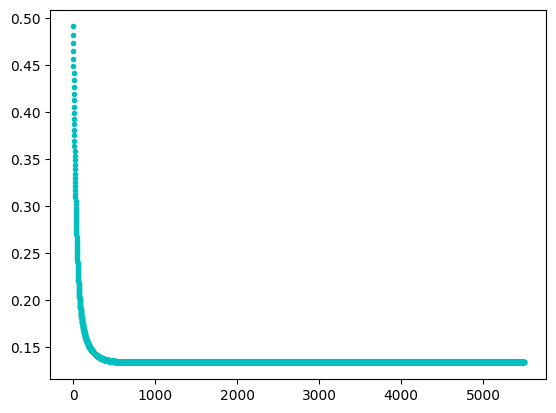

In [27]:
alpha = 0.01
numIter = 5500
J = np.zeros(numIter,)
Beta = np.zeros((3,1))

Beta, J = Gradiente(Beta,alpha,m,X,y,numIter,J)

plt.plot(J,'.c')


3.1 ¿Why is it necessary to normalize the X variables?

R: Normalization is important, since it allows comparing data that cannot be compared at first. The above, since the standard deviation is used, with respect to its mean, for all the data.

3.2 ¿What can happen if the variable alpha (𝛼) increases or decreases?
R: Since alpha is the one that regulates the separation of the data, if alpha increases, it may be more difficult to find a stabilization of the global values, regularly 0.01 is used for linear regression.